In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:

test_img_path='/content/drive/MyDrive/standardleaves/standardleaves/4.jpg'

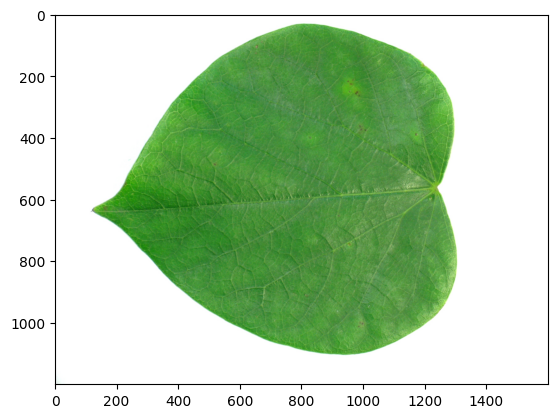

In [ ]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

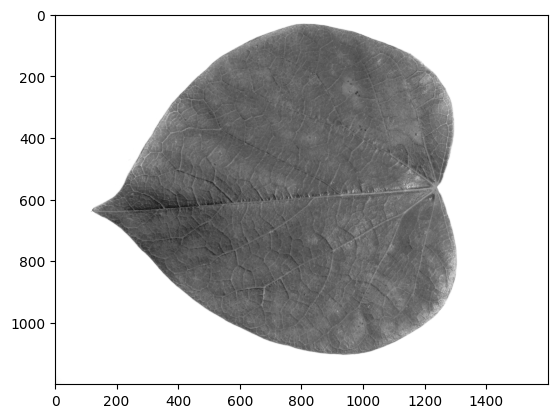

In [ ]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [ ]:
gs.shape

(1200, 1600)

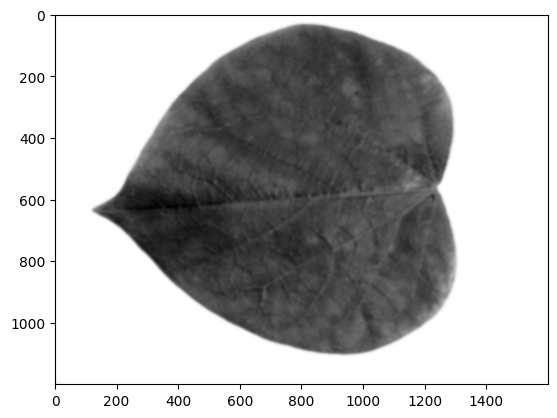

In [ ]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

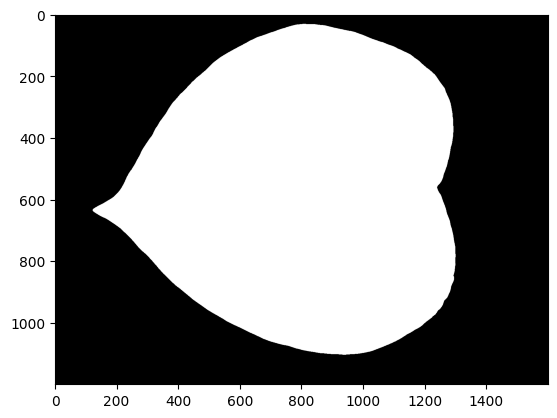

In [ ]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

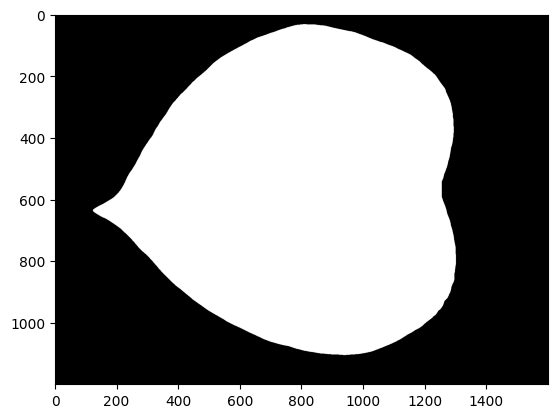

In [ ]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='Greys_r')

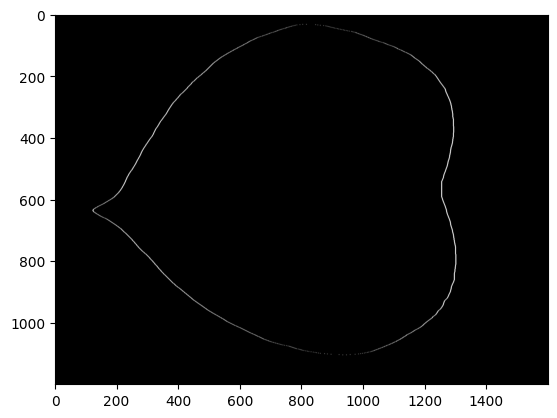

In [ ]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

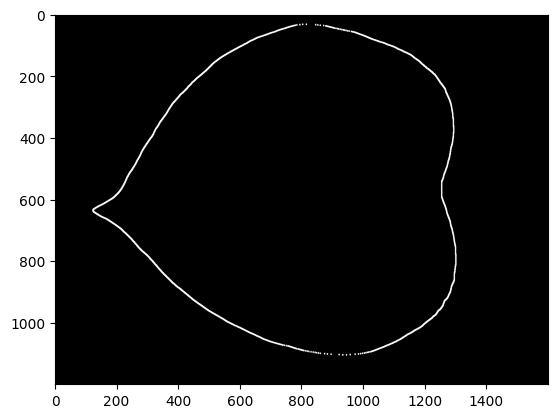

In [ ]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

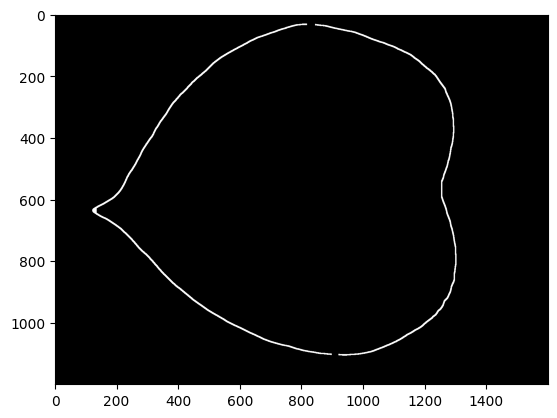

In [ ]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

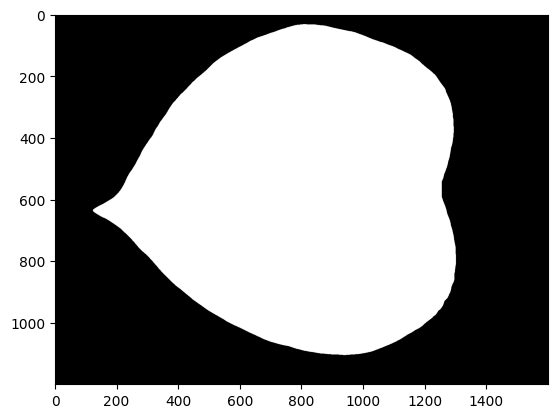

In [ ]:
plt.imshow(closing,cmap="Greys_r")

In [ ]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

1

In [ ]:
cnt = contours[0]
len(cnt)

1657

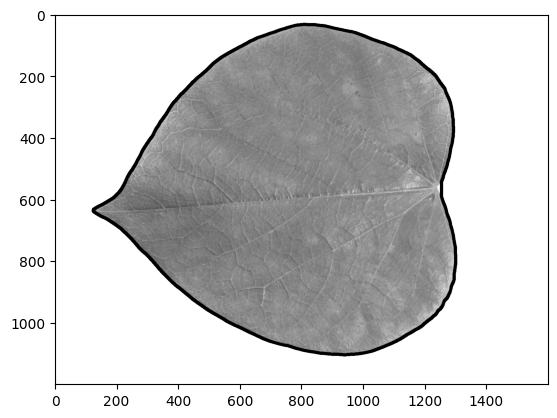

In [ ]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

In [ ]:
M = cv2.moments(cnt)
M

{'m00': 893382.0,
 'm10': 716772624.3333333,
 'm01': 513935833.8333333,
 'm20': 641780934396.0,
 'm11': 413123375192.6666,
 'm02': 358693163108.1666,
 'm30': 618862681461229.4,
 'm21': 371230216073273.75,
 'm12': 291564142233058.9,
 'm03': 278376158183073.06,
 'mu20': 66704432973.65918,
 'mu11': 785611105.5704346,
 'mu02': 63041312838.11017,
 'mu30': -3082721007717.75,
 'mu21': 772305879387.7656,
 'mu12': 2875823855606.6094,
 'mu03': -500793928247.46875,
 'nu20': 0.08357575350019111,
 'nu11': 0.000984312993592118,
 'nu02': 0.07898613311302546,
 'nu30': -0.004086403306837658,
 'nu21': 0.0010237557312255115,
 'nu12': 0.003812143909232233,
 'nu03': -0.0006638440388576504}

In [ ]:
area = cv2.contourArea(cnt)
area

893382.0

In [ ]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3731.2959266901016

<ipython-input-20-eb1a7da1991d>:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


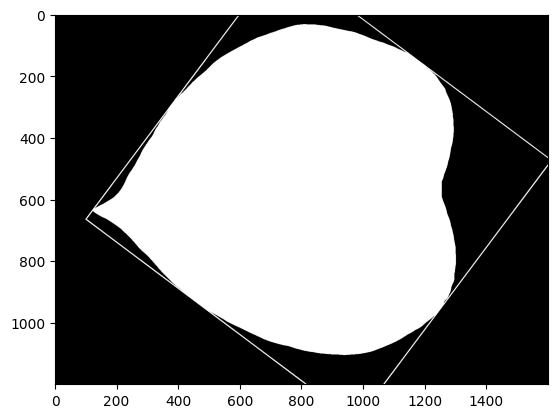

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

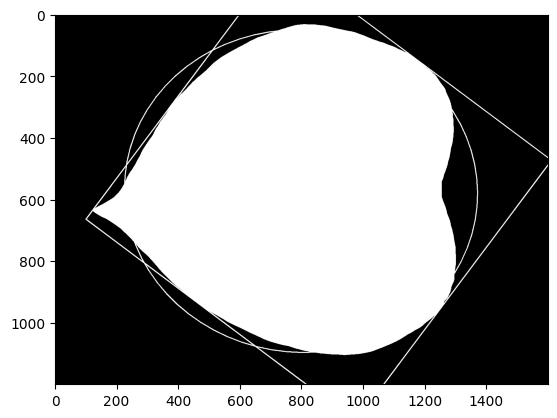

In [ ]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.097856477166822

In [ ]:
rectangularity = w*h/area
rectangularity

1.4148415795258915

In [ ]:
circularity = ((perimeter)**2)/area
circularity

15.584116640512283

In [ ]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

1066.5314298953356

In [ ]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

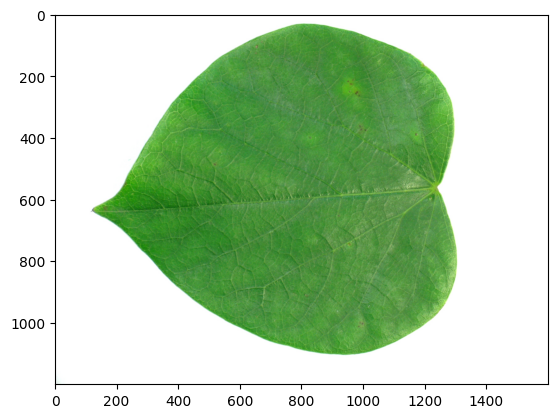

In [ ]:
plt.imshow(img,cmap="Greys_r")

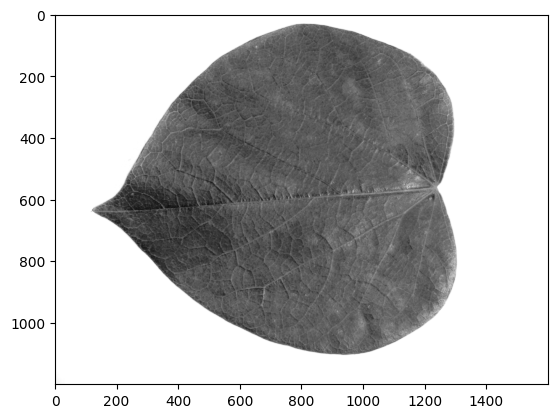

In [ ]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

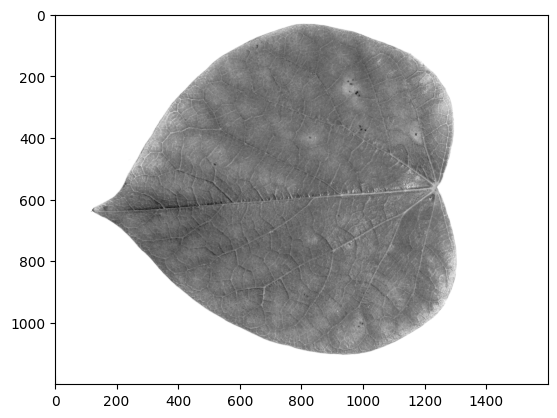

In [ ]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

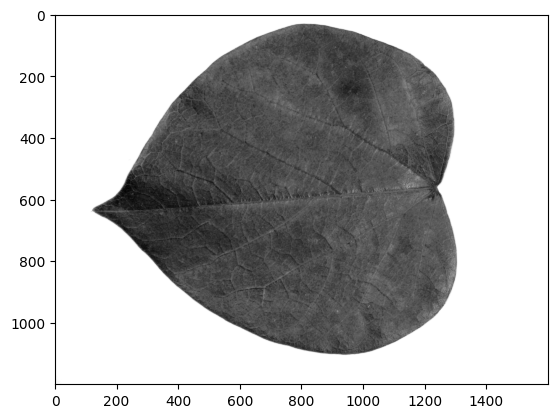

In [ ]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [ ]:
np.mean(blue_channel)

164.2493375

In [ ]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0
red_mean = np.mean(red_channel)
red_mean

38.2519359375

In [ ]:
green_mean = np.mean(green_channel)
green_mean

71.11508125

In [ ]:
blue_mean = np.mean(blue_channel)
blue_mean

30.4650484375

In [ ]:
red_var = np.std(red_channel)
red_var

44.14601118792308

In [ ]:
# Texture based features


In [ ]:
!pip install mahotas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.6 MB/s eta 0:00:00


In [ ]:
import mahotas as mt
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 2.70411641e-01,  1.38918242e+02,  9.87310193e-01,  5.47356423e+03,
        6.35495407e-01,  3.73468084e+02,  2.17553387e+04,  4.19656544e+00,
        5.86949366e+00,  1.34986764e-03,  2.55895710e+00, -4.29023580e-01,
        9.79358557e-01])

In [ ]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

138.91824155307768
0.9873101932150122
0.6354954068905303
5.869493663727562


In [ ]:
!pip install opencv-python
!pip install mahotas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 14.5 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
ds_path = r"/content/drive/MyDrive/Leaves/"
img_files = os.listdir(ds_path)

In [ ]:
def create_dataset():
    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    for file in img_files:
        imgpath = os.path.join(ds_path, file)  # Use os.path.join for path concatenation
        print(imgpath)
        main_img = cv2.imread(imgpath)

    # # Check if the image is loaded successfully
    # if main_img is None:
    #     print(f"Error loading image: {imgpath}")
    #     continue  # Skip to the next iteration

        #Preprocessing
        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
        gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gs, (25,25),0)
        ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        kernel = np.ones((50,50),np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

        #Shape features
        contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        rectangularity = w*h/area
        circularity = ((perimeter)**2)/area

        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0

        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)

        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)

        #Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]

        vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,inverse_diff_moments,entropy
                 ]

        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
        print(file)
    return df

In [ ]:
dataset = create_dataset()

/content/drive/MyDrive/Leaves/2285.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2285.jpg
/content/drive/MyDrive/Leaves/2504.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2504.jpg
/content/drive/MyDrive/Leaves/2239.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2239.jpg
/content/drive/MyDrive/Leaves/2329.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2329.jpg
/content/drive/MyDrive/Leaves/2355.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2355.jpg
/content/drive/MyDrive/Leaves/2256.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2256.jpg
/content/drive/MyDrive/Leaves/2489.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2489.jpg
/content/drive/MyDrive/Leaves/2257.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2257.jpg
/content/drive/MyDrive/Leaves/2323.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2323.jpg
/content/drive/MyDrive/Leaves/2403.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2403.jpg
/content/drive/MyDrive/Leaves/2242.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2242.jpg
/content/drive/MyDrive/Leaves/2362.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2362.jpg
/content/drive/MyDrive/Leaves/2314.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2314.jpg
/content/drive/MyDrive/Leaves/2353.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2353.jpg
/content/drive/MyDrive/Leaves/2493.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2493.jpg
/content/drive/MyDrive/Leaves/2400.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2400.jpg
/content/drive/MyDrive/Leaves/2310.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2310.jpg
/content/drive/MyDrive/Leaves/2272.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2272.jpg
/content/drive/MyDrive/Leaves/2507.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2507.jpg
/content/drive/MyDrive/Leaves/2317.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2317.jpg
/content/drive/MyDrive/Leaves/2462.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2462.jpg
/content/drive/MyDrive/Leaves/2487.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2487.jpg
/content/drive/MyDrive/Leaves/2277.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2277.jpg
/content/drive/MyDrive/Leaves/2270.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2270.jpg
/content/drive/MyDrive/Leaves/2276.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2276.jpg
/content/drive/MyDrive/Leaves/2451.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2451.jpg
/content/drive/MyDrive/Leaves/2425.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2425.jpg
/content/drive/MyDrive/Leaves/2424.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2424.jpg
/content/drive/MyDrive/Leaves/2340.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2340.jpg
/content/drive/MyDrive/Leaves/2437.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2437.jpg
/content/drive/MyDrive/Leaves/2426.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2426.jpg
/content/drive/MyDrive/Leaves/2347.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2347.jpg
/content/drive/MyDrive/Leaves/2438.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2438.jpg
/content/drive/MyDrive/Leaves/2318.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2318.jpg
/content/drive/MyDrive/Leaves/2326.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2326.jpg
/content/drive/MyDrive/Leaves/2385.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2385.jpg
/content/drive/MyDrive/Leaves/2497.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2497.jpg
/content/drive/MyDrive/Leaves/2268.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2268.jpg
/content/drive/MyDrive/Leaves/2273.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2273.jpg
/content/drive/MyDrive/Leaves/2281.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2281.jpg
/content/drive/MyDrive/Leaves/2463.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2463.jpg
/content/drive/MyDrive/Leaves/2262.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2262.jpg
/content/drive/MyDrive/Leaves/2376.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2376.jpg
/content/drive/MyDrive/Leaves/2236.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2236.jpg
/content/drive/MyDrive/Leaves/2240.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2240.jpg
/content/drive/MyDrive/Leaves/2246.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2246.jpg
/content/drive/MyDrive/Leaves/2367.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2367.jpg
/content/drive/MyDrive/Leaves/2455.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2455.jpg
/content/drive/MyDrive/Leaves/2316.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2316.jpg
/content/drive/MyDrive/Leaves/2484.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2484.jpg
/content/drive/MyDrive/Leaves/2454.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2454.jpg
/content/drive/MyDrive/Leaves/2491.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2491.jpg
/content/drive/MyDrive/Leaves/2328.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2328.jpg
/content/drive/MyDrive/Leaves/2365.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2365.jpg
/content/drive/MyDrive/Leaves/2299.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2299.jpg
/content/drive/MyDrive/Leaves/2315.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2315.jpg
/content/drive/MyDrive/Leaves/2247.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2247.jpg
/content/drive/MyDrive/Leaves/2371.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2371.jpg
/content/drive/MyDrive/Leaves/2361.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2361.jpg
/content/drive/MyDrive/Leaves/2251.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2251.jpg
/content/drive/MyDrive/Leaves/2343.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2343.jpg
/content/drive/MyDrive/Leaves/2399.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2399.jpg
/content/drive/MyDrive/Leaves/2292.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2292.jpg
/content/drive/MyDrive/Leaves/2354.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2354.jpg
/content/drive/MyDrive/Leaves/2250.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2250.jpg
/content/drive/MyDrive/Leaves/2508.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2508.jpg
/content/drive/MyDrive/Leaves/2496.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2496.jpg
/content/drive/MyDrive/Leaves/2226.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2226.jpg
/content/drive/MyDrive/Leaves/2341.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2341.jpg
/content/drive/MyDrive/Leaves/2325.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2325.jpg
/content/drive/MyDrive/Leaves/2452.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2452.jpg
/content/drive/MyDrive/Leaves/2231.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2231.jpg
/content/drive/MyDrive/Leaves/2224.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2224.jpg
/content/drive/MyDrive/Leaves/2373.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2373.jpg
/content/drive/MyDrive/Leaves/2337.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2337.jpg
/content/drive/MyDrive/Leaves/2266.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2266.jpg
/content/drive/MyDrive/Leaves/2418.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2418.jpg
/content/drive/MyDrive/Leaves/2225.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2225.jpg
/content/drive/MyDrive/Leaves/2380.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2380.jpg
/content/drive/MyDrive/Leaves/2359.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2359.jpg
/content/drive/MyDrive/Leaves/2254.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2254.jpg
/content/drive/MyDrive/Leaves/2408.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2408.jpg
/content/drive/MyDrive/Leaves/2305.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2305.jpg
/content/drive/MyDrive/Leaves/2434.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2434.jpg
/content/drive/MyDrive/Leaves/2275.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2275.jpg
/content/drive/MyDrive/Leaves/2360.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2360.jpg
/content/drive/MyDrive/Leaves/2332.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2332.jpg
/content/drive/MyDrive/Leaves/2370.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2370.jpg
/content/drive/MyDrive/Leaves/2366.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2366.jpg
/content/drive/MyDrive/Leaves/2382.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2382.jpg
/content/drive/MyDrive/Leaves/2469.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2469.jpg
/content/drive/MyDrive/Leaves/2429.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2429.jpg
/content/drive/MyDrive/Leaves/2473.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2473.jpg
/content/drive/MyDrive/Leaves/2368.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2368.jpg
/content/drive/MyDrive/Leaves/2447.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2447.jpg
/content/drive/MyDrive/Leaves/2279.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2279.jpg
/content/drive/MyDrive/Leaves/2486.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2486.jpg
/content/drive/MyDrive/Leaves/2321.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2321.jpg
/content/drive/MyDrive/Leaves/2306.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2306.jpg
/content/drive/MyDrive/Leaves/2483.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2483.jpg
/content/drive/MyDrive/Leaves/2402.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2402.jpg
/content/drive/MyDrive/Leaves/2445.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2445.jpg
/content/drive/MyDrive/Leaves/2300.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2300.jpg
/content/drive/MyDrive/Leaves/2393.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2393.jpg
/content/drive/MyDrive/Leaves/2468.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2468.jpg
/content/drive/MyDrive/Leaves/2377.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2377.jpg
/content/drive/MyDrive/Leaves/2322.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2322.jpg
/content/drive/MyDrive/Leaves/2495.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2495.jpg
/content/drive/MyDrive/Leaves/2414.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2414.jpg
/content/drive/MyDrive/Leaves/2467.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2467.jpg
/content/drive/MyDrive/Leaves/2505.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2505.jpg
/content/drive/MyDrive/Leaves/2227.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2227.jpg
/content/drive/MyDrive/Leaves/2501.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2501.jpg
/content/drive/MyDrive/Leaves/2389.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2389.jpg
/content/drive/MyDrive/Leaves/2244.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2244.jpg
/content/drive/MyDrive/Leaves/2296.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2296.jpg
/content/drive/MyDrive/Leaves/2390.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2390.jpg
/content/drive/MyDrive/Leaves/2413.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2413.jpg
/content/drive/MyDrive/Leaves/2397.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2397.jpg
/content/drive/MyDrive/Leaves/2269.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2269.jpg
/content/drive/MyDrive/Leaves/2477.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2477.jpg
/content/drive/MyDrive/Leaves/2478.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2478.jpg
/content/drive/MyDrive/Leaves/2420.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2420.jpg
/content/drive/MyDrive/Leaves/2480.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2480.jpg
/content/drive/MyDrive/Leaves/2311.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2311.jpg
/content/drive/MyDrive/Leaves/2374.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2374.jpg
/content/drive/MyDrive/Leaves/2465.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2465.jpg
/content/drive/MyDrive/Leaves/2260.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2260.jpg
/content/drive/MyDrive/Leaves/2344.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2344.jpg
/content/drive/MyDrive/Leaves/2249.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2249.jpg
/content/drive/MyDrive/Leaves/2415.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2415.jpg
/content/drive/MyDrive/Leaves/2417.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2417.jpg
/content/drive/MyDrive/Leaves/2416.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2416.jpg
/content/drive/MyDrive/Leaves/2435.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2435.jpg
/content/drive/MyDrive/Leaves/2271.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2271.jpg
/content/drive/MyDrive/Leaves/2229.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2229.jpg
/content/drive/MyDrive/Leaves/2500.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2500.jpg
/content/drive/MyDrive/Leaves/2401.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2401.jpg
/content/drive/MyDrive/Leaves/2388.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2388.jpg
/content/drive/MyDrive/Leaves/2294.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2294.jpg
/content/drive/MyDrive/Leaves/2407.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2407.jpg
/content/drive/MyDrive/Leaves/2406.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2406.jpg
/content/drive/MyDrive/Leaves/2379.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2379.jpg
/content/drive/MyDrive/Leaves/2248.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2248.jpg
/content/drive/MyDrive/Leaves/2283.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2283.jpg
/content/drive/MyDrive/Leaves/2232.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2232.jpg
/content/drive/MyDrive/Leaves/2411.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2411.jpg
/content/drive/MyDrive/Leaves/2422.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2422.jpg
/content/drive/MyDrive/Leaves/2356.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2356.jpg
/content/drive/MyDrive/Leaves/2349.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2349.jpg
/content/drive/MyDrive/Leaves/2443.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2443.jpg
/content/drive/MyDrive/Leaves/2494.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2494.jpg
/content/drive/MyDrive/Leaves/2439.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2439.jpg
/content/drive/MyDrive/Leaves/2307.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2307.jpg
/content/drive/MyDrive/Leaves/2375.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2375.jpg
/content/drive/MyDrive/Leaves/2502.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2502.jpg
/content/drive/MyDrive/Leaves/2394.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2394.jpg
/content/drive/MyDrive/Leaves/2346.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2346.jpg
/content/drive/MyDrive/Leaves/2458.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2458.jpg
/content/drive/MyDrive/Leaves/2289.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2289.jpg
/content/drive/MyDrive/Leaves/2364.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2364.jpg
/content/drive/MyDrive/Leaves/2409.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2409.jpg
/content/drive/MyDrive/Leaves/2464.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2464.jpg
/content/drive/MyDrive/Leaves/2238.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2238.jpg
/content/drive/MyDrive/Leaves/2288.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2288.jpg
/content/drive/MyDrive/Leaves/2476.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2476.jpg
/content/drive/MyDrive/Leaves/2335.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2335.jpg
/content/drive/MyDrive/Leaves/2234.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2234.jpg
/content/drive/MyDrive/Leaves/2345.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2345.jpg
/content/drive/MyDrive/Leaves/2297.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2297.jpg
/content/drive/MyDrive/Leaves/2405.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2405.jpg
/content/drive/MyDrive/Leaves/2479.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2479.jpg
/content/drive/MyDrive/Leaves/2293.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2293.jpg
/content/drive/MyDrive/Leaves/2488.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2488.jpg
/content/drive/MyDrive/Leaves/2330.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2330.jpg
/content/drive/MyDrive/Leaves/2291.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2291.jpg
/content/drive/MyDrive/Leaves/2499.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2499.jpg
/content/drive/MyDrive/Leaves/2485.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2485.jpg
/content/drive/MyDrive/Leaves/2237.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2237.jpg
/content/drive/MyDrive/Leaves/2481.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2481.jpg
/content/drive/MyDrive/Leaves/2358.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2358.jpg
/content/drive/MyDrive/Leaves/2241.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2241.jpg
/content/drive/MyDrive/Leaves/2303.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2303.jpg
/content/drive/MyDrive/Leaves/2398.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2398.jpg
/content/drive/MyDrive/Leaves/2320.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2320.jpg
/content/drive/MyDrive/Leaves/2334.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2334.jpg
/content/drive/MyDrive/Leaves/2470.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2470.jpg
/content/drive/MyDrive/Leaves/2427.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2427.jpg
/content/drive/MyDrive/Leaves/2436.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2436.jpg
/content/drive/MyDrive/Leaves/2351.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2351.jpg
/content/drive/MyDrive/Leaves/2457.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2457.jpg
/content/drive/MyDrive/Leaves/2461.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2461.jpg
/content/drive/MyDrive/Leaves/2339.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2339.jpg
/content/drive/MyDrive/Leaves/2259.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2259.jpg
/content/drive/MyDrive/Leaves/2261.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2261.jpg
/content/drive/MyDrive/Leaves/2466.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2466.jpg
/content/drive/MyDrive/Leaves/2263.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2263.jpg
/content/drive/MyDrive/Leaves/2482.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2482.jpg
/content/drive/MyDrive/Leaves/2278.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2278.jpg
/content/drive/MyDrive/Leaves/2252.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2252.jpg
/content/drive/MyDrive/Leaves/2444.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2444.jpg
/content/drive/MyDrive/Leaves/2298.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2298.jpg
/content/drive/MyDrive/Leaves/2492.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2492.jpg
/content/drive/MyDrive/Leaves/2333.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2333.jpg
/content/drive/MyDrive/Leaves/2290.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2290.jpg
/content/drive/MyDrive/Leaves/2431.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2431.jpg
/content/drive/MyDrive/Leaves/2412.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2412.jpg
/content/drive/MyDrive/Leaves/2459.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2459.jpg
/content/drive/MyDrive/Leaves/2453.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2453.jpg
/content/drive/MyDrive/Leaves/2357.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2357.jpg
/content/drive/MyDrive/Leaves/2456.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2456.jpg
/content/drive/MyDrive/Leaves/2264.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2264.jpg
/content/drive/MyDrive/Leaves/2410.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2410.jpg
/content/drive/MyDrive/Leaves/2383.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2383.jpg
/content/drive/MyDrive/Leaves/2381.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2381.jpg
/content/drive/MyDrive/Leaves/2301.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2301.jpg
/content/drive/MyDrive/Leaves/2633.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2633.jpg
/content/drive/MyDrive/Leaves/2515.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2515.jpg
/content/drive/MyDrive/Leaves/2533.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2533.jpg
/content/drive/MyDrive/Leaves/2555.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2555.jpg
/content/drive/MyDrive/Leaves/2534.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2534.jpg
/content/drive/MyDrive/Leaves/3085.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3085.jpg
/content/drive/MyDrive/Leaves/3032.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3032.jpg
/content/drive/MyDrive/Leaves/3039.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3039.jpg
/content/drive/MyDrive/Leaves/3013.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3013.jpg
/content/drive/MyDrive/Leaves/2522.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2522.jpg
/content/drive/MyDrive/Leaves/3191.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3191.jpg
/content/drive/MyDrive/Leaves/3186.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3186.jpg
/content/drive/MyDrive/Leaves/2521.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2521.jpg
/content/drive/MyDrive/Leaves/2675.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2675.jpg
/content/drive/MyDrive/Leaves/3190.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3190.jpg
/content/drive/MyDrive/Leaves/3150.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3150.jpg
/content/drive/MyDrive/Leaves/2672.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2672.jpg
/content/drive/MyDrive/Leaves/2638.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2638.jpg
/content/drive/MyDrive/Leaves/3016.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3016.jpg
/content/drive/MyDrive/Leaves/3147.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3147.jpg
/content/drive/MyDrive/Leaves/3103.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3103.jpg
/content/drive/MyDrive/Leaves/3051.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3051.jpg
/content/drive/MyDrive/Leaves/3095.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3095.jpg
/content/drive/MyDrive/Leaves/3048.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3048.jpg
/content/drive/MyDrive/Leaves/3088.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3088.jpg
/content/drive/MyDrive/Leaves/2631.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2631.jpg
/content/drive/MyDrive/Leaves/2671.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2671.jpg
/content/drive/MyDrive/Leaves/2639.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2639.jpg
/content/drive/MyDrive/Leaves/2573.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2573.jpg
/content/drive/MyDrive/Leaves/3060.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3060.jpg
/content/drive/MyDrive/Leaves/3090.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3090.jpg
/content/drive/MyDrive/Leaves/2525.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2525.jpg
/content/drive/MyDrive/Leaves/2603.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2603.jpg
/content/drive/MyDrive/Leaves/3059.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3059.jpg
/content/drive/MyDrive/Leaves/2587.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2587.jpg
/content/drive/MyDrive/Leaves/3014.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3014.jpg
/content/drive/MyDrive/Leaves/3081.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3081.jpg
/content/drive/MyDrive/Leaves/3130.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3130.jpg
/content/drive/MyDrive/Leaves/2553.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2553.jpg
/content/drive/MyDrive/Leaves/2541.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2541.jpg
/content/drive/MyDrive/Leaves/2579.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2579.jpg
/content/drive/MyDrive/Leaves/2623.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2623.jpg
/content/drive/MyDrive/Leaves/2610.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2610.jpg
/content/drive/MyDrive/Leaves/2628.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2628.jpg
/content/drive/MyDrive/Leaves/2667.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2667.jpg
/content/drive/MyDrive/Leaves/2649.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2649.jpg
/content/drive/MyDrive/Leaves/3112.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3112.jpg
/content/drive/MyDrive/Leaves/3158.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3158.jpg
/content/drive/MyDrive/Leaves/2535.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2535.jpg
/content/drive/MyDrive/Leaves/3143.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3143.jpg
/content/drive/MyDrive/Leaves/2516.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2516.jpg
/content/drive/MyDrive/Leaves/2594.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2594.jpg
/content/drive/MyDrive/Leaves/3180.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3180.jpg
/content/drive/MyDrive/Leaves/3065.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3065.jpg
/content/drive/MyDrive/Leaves/3027.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3027.jpg
/content/drive/MyDrive/Leaves/3174.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3174.jpg
/content/drive/MyDrive/Leaves/3001.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3001.jpg
/content/drive/MyDrive/Leaves/3167.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3167.jpg
/content/drive/MyDrive/Leaves/2632.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2632.jpg
/content/drive/MyDrive/Leaves/2646.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2646.jpg
/content/drive/MyDrive/Leaves/3037.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3037.jpg
/content/drive/MyDrive/Leaves/3129.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3129.jpg
/content/drive/MyDrive/Leaves/3012.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3012.jpg
/content/drive/MyDrive/Leaves/3076.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3076.jpg
/content/drive/MyDrive/Leaves/3156.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3156.jpg
/content/drive/MyDrive/Leaves/2585.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2585.jpg
/content/drive/MyDrive/Leaves/2561.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2561.jpg
/content/drive/MyDrive/Leaves/2532.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2532.jpg
/content/drive/MyDrive/Leaves/3149.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3149.jpg
/content/drive/MyDrive/Leaves/2537.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2537.jpg
/content/drive/MyDrive/Leaves/3002.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3002.jpg
/content/drive/MyDrive/Leaves/3172.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3172.jpg
/content/drive/MyDrive/Leaves/3166.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3166.jpg
/content/drive/MyDrive/Leaves/3091.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3091.jpg
/content/drive/MyDrive/Leaves/3042.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3042.jpg
/content/drive/MyDrive/Leaves/3138.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3138.jpg
/content/drive/MyDrive/Leaves/2586.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2586.jpg
/content/drive/MyDrive/Leaves/3019.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3019.jpg
/content/drive/MyDrive/Leaves/3177.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3177.jpg
/content/drive/MyDrive/Leaves/3034.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3034.jpg
/content/drive/MyDrive/Leaves/2519.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2519.jpg
/content/drive/MyDrive/Leaves/2546.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2546.jpg
/content/drive/MyDrive/Leaves/2599.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2599.jpg
/content/drive/MyDrive/Leaves/3084.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3084.jpg
/content/drive/MyDrive/Leaves/2608.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2608.jpg
/content/drive/MyDrive/Leaves/3184.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3184.jpg
/content/drive/MyDrive/Leaves/3064.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3064.jpg
/content/drive/MyDrive/Leaves/2663.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2663.jpg
/content/drive/MyDrive/Leaves/2598.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2598.jpg
/content/drive/MyDrive/Leaves/2539.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2539.jpg
/content/drive/MyDrive/Leaves/3118.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3118.jpg
/content/drive/MyDrive/Leaves/3139.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3139.jpg
/content/drive/MyDrive/Leaves/2583.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2583.jpg
/content/drive/MyDrive/Leaves/3046.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3046.jpg
/content/drive/MyDrive/Leaves/2653.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2653.jpg
/content/drive/MyDrive/Leaves/3101.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3101.jpg
/content/drive/MyDrive/Leaves/3111.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3111.jpg
/content/drive/MyDrive/Leaves/2560.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2560.jpg
/content/drive/MyDrive/Leaves/2609.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2609.jpg
/content/drive/MyDrive/Leaves/2624.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2624.jpg
/content/drive/MyDrive/Leaves/3185.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3185.jpg
/content/drive/MyDrive/Leaves/3153.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3153.jpg
/content/drive/MyDrive/Leaves/3107.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3107.jpg
/content/drive/MyDrive/Leaves/2662.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2662.jpg
/content/drive/MyDrive/Leaves/3142.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3142.jpg
/content/drive/MyDrive/Leaves/2669.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2669.jpg
/content/drive/MyDrive/Leaves/2540.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2540.jpg
/content/drive/MyDrive/Leaves/2634.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2634.jpg
/content/drive/MyDrive/Leaves/3120.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3120.jpg
/content/drive/MyDrive/Leaves/2607.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2607.jpg
/content/drive/MyDrive/Leaves/3109.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3109.jpg
/content/drive/MyDrive/Leaves/2673.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2673.jpg
/content/drive/MyDrive/Leaves/3115.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3115.jpg
/content/drive/MyDrive/Leaves/2640.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2640.jpg
/content/drive/MyDrive/Leaves/2578.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2578.jpg
/content/drive/MyDrive/Leaves/3183.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3183.jpg
/content/drive/MyDrive/Leaves/2664.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2664.jpg
/content/drive/MyDrive/Leaves/2576.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2576.jpg
/content/drive/MyDrive/Leaves/2650.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2650.jpg
/content/drive/MyDrive/Leaves/3140.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3140.jpg
/content/drive/MyDrive/Leaves/3114.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3114.jpg
/content/drive/MyDrive/Leaves/2547.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2547.jpg
/content/drive/MyDrive/Leaves/2629.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2629.jpg
/content/drive/MyDrive/Leaves/3069.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3069.jpg
/content/drive/MyDrive/Leaves/2643.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2643.jpg
/content/drive/MyDrive/Leaves/3189.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3189.jpg
/content/drive/MyDrive/Leaves/3100.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3100.jpg
/content/drive/MyDrive/Leaves/3086.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3086.jpg
/content/drive/MyDrive/Leaves/3179.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3179.jpg
/content/drive/MyDrive/Leaves/2523.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2523.jpg
/content/drive/MyDrive/Leaves/3146.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3146.jpg
/content/drive/MyDrive/Leaves/2591.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2591.jpg
/content/drive/MyDrive/Leaves/2545.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2545.jpg
/content/drive/MyDrive/Leaves/3024.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3024.jpg
/content/drive/MyDrive/Leaves/3056.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3056.jpg
/content/drive/MyDrive/Leaves/2513.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2513.jpg
/content/drive/MyDrive/Leaves/3053.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3053.jpg
/content/drive/MyDrive/Leaves/2618.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2618.jpg
/content/drive/MyDrive/Leaves/2575.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2575.jpg
/content/drive/MyDrive/Leaves/3178.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3178.jpg
/content/drive/MyDrive/Leaves/3020.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3020.jpg
/content/drive/MyDrive/Leaves/3050.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3050.jpg
/content/drive/MyDrive/Leaves/2512.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2512.jpg
/content/drive/MyDrive/Leaves/3169.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3169.jpg
/content/drive/MyDrive/Leaves/3145.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3145.jpg
/content/drive/MyDrive/Leaves/3038.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3038.jpg
/content/drive/MyDrive/Leaves/2551.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2551.jpg
/content/drive/MyDrive/Leaves/2647.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2647.jpg
/content/drive/MyDrive/Leaves/3122.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3122.jpg
/content/drive/MyDrive/Leaves/2557.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2557.jpg
/content/drive/MyDrive/Leaves/3021.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3021.jpg
/content/drive/MyDrive/Leaves/2590.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2590.jpg
/content/drive/MyDrive/Leaves/3162.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3162.jpg
/content/drive/MyDrive/Leaves/2666.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2666.jpg
/content/drive/MyDrive/Leaves/2659.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2659.jpg
/content/drive/MyDrive/Leaves/3148.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3148.jpg
/content/drive/MyDrive/Leaves/3096.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3096.jpg
/content/drive/MyDrive/Leaves/2596.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2596.jpg
/content/drive/MyDrive/Leaves/3003.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3003.jpg
/content/drive/MyDrive/Leaves/2566.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2566.jpg
/content/drive/MyDrive/Leaves/2641.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2641.jpg
/content/drive/MyDrive/Leaves/3121.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3121.jpg
/content/drive/MyDrive/Leaves/3159.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3159.jpg
/content/drive/MyDrive/Leaves/3163.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3163.jpg
/content/drive/MyDrive/Leaves/3126.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3126.jpg
/content/drive/MyDrive/Leaves/2520.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2520.jpg
/content/drive/MyDrive/Leaves/2567.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2567.jpg
/content/drive/MyDrive/Leaves/3102.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3102.jpg
/content/drive/MyDrive/Leaves/2652.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2652.jpg
/content/drive/MyDrive/Leaves/3176.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3176.jpg
/content/drive/MyDrive/Leaves/2544.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2544.jpg
/content/drive/MyDrive/Leaves/2549.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2549.jpg
/content/drive/MyDrive/Leaves/2529.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2529.jpg
/content/drive/MyDrive/Leaves/3168.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3168.jpg
/content/drive/MyDrive/Leaves/3108.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3108.jpg
/content/drive/MyDrive/Leaves/3009.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3009.jpg
/content/drive/MyDrive/Leaves/3062.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3062.jpg
/content/drive/MyDrive/Leaves/2604.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2604.jpg
/content/drive/MyDrive/Leaves/2589.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2589.jpg
/content/drive/MyDrive/Leaves/3052.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3052.jpg
/content/drive/MyDrive/Leaves/2509.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2509.jpg
/content/drive/MyDrive/Leaves/3135.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3135.jpg
/content/drive/MyDrive/Leaves/2511.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2511.jpg
/content/drive/MyDrive/Leaves/2612.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2612.jpg
/content/drive/MyDrive/Leaves/3092.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3092.jpg
/content/drive/MyDrive/Leaves/3022.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3022.jpg
/content/drive/MyDrive/Leaves/2644.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2644.jpg
/content/drive/MyDrive/Leaves/2656.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2656.jpg
/content/drive/MyDrive/Leaves/2569.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2569.jpg
/content/drive/MyDrive/Leaves/3154.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3154.jpg
/content/drive/MyDrive/Leaves/2620.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2620.jpg
/content/drive/MyDrive/Leaves/3160.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3160.jpg
/content/drive/MyDrive/Leaves/3119.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3119.jpg
/content/drive/MyDrive/Leaves/3080.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3080.jpg
/content/drive/MyDrive/Leaves/3105.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3105.jpg
/content/drive/MyDrive/Leaves/2635.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2635.jpg
/content/drive/MyDrive/Leaves/2538.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2538.jpg
/content/drive/MyDrive/Leaves/3035.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3035.jpg
/content/drive/MyDrive/Leaves/2602.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2602.jpg
/content/drive/MyDrive/Leaves/2543.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2543.jpg
/content/drive/MyDrive/Leaves/3132.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3132.jpg
/content/drive/MyDrive/Leaves/3094.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3094.jpg
/content/drive/MyDrive/Leaves/3018.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3018.jpg
/content/drive/MyDrive/Leaves/3025.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3025.jpg
/content/drive/MyDrive/Leaves/2554.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2554.jpg
/content/drive/MyDrive/Leaves/3124.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3124.jpg
/content/drive/MyDrive/Leaves/3082.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3082.jpg
/content/drive/MyDrive/Leaves/3106.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3106.jpg
/content/drive/MyDrive/Leaves/3181.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3181.jpg
/content/drive/MyDrive/Leaves/2651.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2651.jpg
/content/drive/MyDrive/Leaves/3011.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3011.jpg
/content/drive/MyDrive/Leaves/3175.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3175.jpg
/content/drive/MyDrive/Leaves/2642.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2642.jpg
/content/drive/MyDrive/Leaves/3110.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3110.jpg
/content/drive/MyDrive/Leaves/2655.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2655.jpg
/content/drive/MyDrive/Leaves/2611.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2611.jpg
/content/drive/MyDrive/Leaves/3083.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3083.jpg
/content/drive/MyDrive/Leaves/3173.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3173.jpg
/content/drive/MyDrive/Leaves/3071.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3071.jpg
/content/drive/MyDrive/Leaves/3098.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3098.jpg
/content/drive/MyDrive/Leaves/2654.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2654.jpg
/content/drive/MyDrive/Leaves/2584.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2584.jpg
/content/drive/MyDrive/Leaves/2645.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2645.jpg
/content/drive/MyDrive/Leaves/2565.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2565.jpg
/content/drive/MyDrive/Leaves/3030.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3030.jpg
/content/drive/MyDrive/Leaves/3125.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3125.jpg
/content/drive/MyDrive/Leaves/3164.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3164.jpg
/content/drive/MyDrive/Leaves/3141.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3141.jpg
/content/drive/MyDrive/Leaves/2665.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2665.jpg
/content/drive/MyDrive/Leaves/2658.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2658.jpg
/content/drive/MyDrive/Leaves/3010.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3010.jpg
/content/drive/MyDrive/Leaves/3029.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3029.jpg
/content/drive/MyDrive/Leaves/3054.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3054.jpg
/content/drive/MyDrive/Leaves/3072.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3072.jpg
/content/drive/MyDrive/Leaves/2517.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2517.jpg
/content/drive/MyDrive/Leaves/3097.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3097.jpg
/content/drive/MyDrive/Leaves/2588.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2588.jpg
/content/drive/MyDrive/Leaves/3188.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3188.jpg
/content/drive/MyDrive/Leaves/2670.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2670.jpg
/content/drive/MyDrive/Leaves/2601.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2601.jpg
/content/drive/MyDrive/Leaves/2621.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2621.jpg
/content/drive/MyDrive/Leaves/2571.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2571.jpg
/content/drive/MyDrive/Leaves/3077.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3077.jpg
/content/drive/MyDrive/Leaves/2606.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2606.jpg
/content/drive/MyDrive/Leaves/2600.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2600.jpg
/content/drive/MyDrive/Leaves/2619.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2619.jpg
/content/drive/MyDrive/Leaves/2581.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2581.jpg
/content/drive/MyDrive/Leaves/3151.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3151.jpg
/content/drive/MyDrive/Leaves/3078.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3078.jpg
/content/drive/MyDrive/Leaves/2648.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2648.jpg
/content/drive/MyDrive/Leaves/3161.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3161.jpg
/content/drive/MyDrive/Leaves/3123.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3123.jpg
/content/drive/MyDrive/Leaves/3089.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3089.jpg
/content/drive/MyDrive/Leaves/2574.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2574.jpg
/content/drive/MyDrive/Leaves/2558.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2558.jpg
/content/drive/MyDrive/Leaves/3008.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3008.jpg
/content/drive/MyDrive/Leaves/3043.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3043.jpg
/content/drive/MyDrive/Leaves/2597.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2597.jpg
/content/drive/MyDrive/Leaves/2674.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2674.jpg
/content/drive/MyDrive/Leaves/2552.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2552.jpg
/content/drive/MyDrive/Leaves/3047.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3047.jpg
/content/drive/MyDrive/Leaves/3066.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3066.jpg
/content/drive/MyDrive/Leaves/3152.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3152.jpg
/content/drive/MyDrive/Leaves/2668.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2668.jpg
/content/drive/MyDrive/Leaves/2536.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2536.jpg
/content/drive/MyDrive/Leaves/3026.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3026.jpg
/content/drive/MyDrive/Leaves/3057.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3057.jpg
/content/drive/MyDrive/Leaves/2660.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2660.jpg
/content/drive/MyDrive/Leaves/3040.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3040.jpg
/content/drive/MyDrive/Leaves/3070.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3070.jpg
/content/drive/MyDrive/Leaves/2593.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2593.jpg
/content/drive/MyDrive/Leaves/3005.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3005.jpg
/content/drive/MyDrive/Leaves/2630.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2630.jpg
/content/drive/MyDrive/Leaves/3074.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3074.jpg
/content/drive/MyDrive/Leaves/3170.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3170.jpg
/content/drive/MyDrive/Leaves/3033.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3033.jpg
/content/drive/MyDrive/Leaves/2518.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2518.jpg
/content/drive/MyDrive/Leaves/2637.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2637.jpg
/content/drive/MyDrive/Leaves/3116.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3116.jpg
/content/drive/MyDrive/Leaves/3127.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3127.jpg
/content/drive/MyDrive/Leaves/2605.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2605.jpg
/content/drive/MyDrive/Leaves/2531.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2531.jpg
/content/drive/MyDrive/Leaves/2526.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2526.jpg
/content/drive/MyDrive/Leaves/2510.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2510.jpg
/content/drive/MyDrive/Leaves/3165.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3165.jpg
/content/drive/MyDrive/Leaves/3036.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3036.jpg
/content/drive/MyDrive/Leaves/3063.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3063.jpg
/content/drive/MyDrive/Leaves/3015.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3015.jpg
/content/drive/MyDrive/Leaves/2617.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2617.jpg
/content/drive/MyDrive/Leaves/3155.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3155.jpg
/content/drive/MyDrive/Leaves/3134.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3134.jpg
/content/drive/MyDrive/Leaves/3031.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3031.jpg
/content/drive/MyDrive/Leaves/3073.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3073.jpg
/content/drive/MyDrive/Leaves/3117.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3117.jpg
/content/drive/MyDrive/Leaves/2625.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2625.jpg
/content/drive/MyDrive/Leaves/3068.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3068.jpg
/content/drive/MyDrive/Leaves/2562.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2562.jpg
/content/drive/MyDrive/Leaves/2514.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2514.jpg
/content/drive/MyDrive/Leaves/2580.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2580.jpg
/content/drive/MyDrive/Leaves/3045.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3045.jpg
/content/drive/MyDrive/Leaves/2592.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2592.jpg
/content/drive/MyDrive/Leaves/3075.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3075.jpg
/content/drive/MyDrive/Leaves/3017.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3017.jpg
/content/drive/MyDrive/Leaves/3187.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3187.jpg
/content/drive/MyDrive/Leaves/3041.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3041.jpg
/content/drive/MyDrive/Leaves/2568.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2568.jpg
/content/drive/MyDrive/Leaves/2626.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2626.jpg
/content/drive/MyDrive/Leaves/3049.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3049.jpg
/content/drive/MyDrive/Leaves/3171.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3171.jpg
/content/drive/MyDrive/Leaves/3061.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3061.jpg
/content/drive/MyDrive/Leaves/3028.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3028.jpg
/content/drive/MyDrive/Leaves/2563.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2563.jpg
/content/drive/MyDrive/Leaves/2636.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2636.jpg
/content/drive/MyDrive/Leaves/2524.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2524.jpg
/content/drive/MyDrive/Leaves/3044.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3044.jpg
/content/drive/MyDrive/Leaves/2616.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2616.jpg
/content/drive/MyDrive/Leaves/2577.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2577.jpg
/content/drive/MyDrive/Leaves/3006.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3006.jpg
/content/drive/MyDrive/Leaves/2542.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2542.jpg
/content/drive/MyDrive/Leaves/3144.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3144.jpg
/content/drive/MyDrive/Leaves/2627.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2627.jpg
/content/drive/MyDrive/Leaves/2530.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2530.jpg
/content/drive/MyDrive/Leaves/2550.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2550.jpg
/content/drive/MyDrive/Leaves/3131.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3131.jpg
/content/drive/MyDrive/Leaves/2570.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2570.jpg
/content/drive/MyDrive/Leaves/2657.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2657.jpg
/content/drive/MyDrive/Leaves/2556.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2556.jpg
/content/drive/MyDrive/Leaves/3023.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3023.jpg
/content/drive/MyDrive/Leaves/3182.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3182.jpg
/content/drive/MyDrive/Leaves/2564.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2564.jpg
/content/drive/MyDrive/Leaves/3104.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3104.jpg
/content/drive/MyDrive/Leaves/3007.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3007.jpg
/content/drive/MyDrive/Leaves/2582.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2582.jpg
/content/drive/MyDrive/Leaves/2661.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2661.jpg
/content/drive/MyDrive/Leaves/2548.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2548.jpg
/content/drive/MyDrive/Leaves/3058.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3058.jpg
/content/drive/MyDrive/Leaves/3136.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3136.jpg
/content/drive/MyDrive/Leaves/3137.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3137.jpg
/content/drive/MyDrive/Leaves/3067.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3067.jpg
/content/drive/MyDrive/Leaves/3128.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3128.jpg
/content/drive/MyDrive/Leaves/3157.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3157.jpg
/content/drive/MyDrive/Leaves/2559.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2559.jpg
/content/drive/MyDrive/Leaves/3087.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3087.jpg
/content/drive/MyDrive/Leaves/2622.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2622.jpg
/content/drive/MyDrive/Leaves/3133.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3133.jpg
/content/drive/MyDrive/Leaves/3099.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3099.jpg
/content/drive/MyDrive/Leaves/3055.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3055.jpg
/content/drive/MyDrive/Leaves/2528.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2528.jpg
/content/drive/MyDrive/Leaves/3093.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3093.jpg
/content/drive/MyDrive/Leaves/2572.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2572.jpg
/content/drive/MyDrive/Leaves/3004.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3004.jpg
/content/drive/MyDrive/Leaves/3113.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3113.jpg
/content/drive/MyDrive/Leaves/3079.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3079.jpg
/content/drive/MyDrive/Leaves/2527.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2527.jpg
/content/drive/MyDrive/Leaves/2595.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


2595.jpg
/content/drive/MyDrive/Leaves/3247.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3247.jpg
/content/drive/MyDrive/Leaves/3327.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3327.jpg
/content/drive/MyDrive/Leaves/3396.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3396.jpg
/content/drive/MyDrive/Leaves/3331.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3331.jpg
/content/drive/MyDrive/Leaves/3250.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3250.jpg
/content/drive/MyDrive/Leaves/3219.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3219.jpg
/content/drive/MyDrive/Leaves/3400.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3400.jpg
/content/drive/MyDrive/Leaves/3318.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3318.jpg
/content/drive/MyDrive/Leaves/3326.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3326.jpg
/content/drive/MyDrive/Leaves/3305.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3305.jpg
/content/drive/MyDrive/Leaves/3241.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3241.jpg
/content/drive/MyDrive/Leaves/3228.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3228.jpg
/content/drive/MyDrive/Leaves/3286.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3286.jpg
/content/drive/MyDrive/Leaves/3230.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3230.jpg
/content/drive/MyDrive/Leaves/3309.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3309.jpg
/content/drive/MyDrive/Leaves/3397.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3397.jpg
/content/drive/MyDrive/Leaves/3355.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3355.jpg
/content/drive/MyDrive/Leaves/3345.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3345.jpg
/content/drive/MyDrive/Leaves/3341.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3341.jpg
/content/drive/MyDrive/Leaves/3370.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3370.jpg
/content/drive/MyDrive/Leaves/3392.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3392.jpg
/content/drive/MyDrive/Leaves/3221.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3221.jpg
/content/drive/MyDrive/Leaves/3324.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3324.jpg
/content/drive/MyDrive/Leaves/3339.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3339.jpg
/content/drive/MyDrive/Leaves/3223.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3223.jpg
/content/drive/MyDrive/Leaves/3388.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3388.jpg
/content/drive/MyDrive/Leaves/3206.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3206.jpg
/content/drive/MyDrive/Leaves/3272.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3272.jpg
/content/drive/MyDrive/Leaves/3298.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3298.jpg
/content/drive/MyDrive/Leaves/3200.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3200.jpg
/content/drive/MyDrive/Leaves/3381.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3381.jpg
/content/drive/MyDrive/Leaves/3363.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3363.jpg
/content/drive/MyDrive/Leaves/3284.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3284.jpg
/content/drive/MyDrive/Leaves/3227.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3227.jpg
/content/drive/MyDrive/Leaves/3384.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3384.jpg
/content/drive/MyDrive/Leaves/3391.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3391.jpg
/content/drive/MyDrive/Leaves/3366.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3366.jpg
/content/drive/MyDrive/Leaves/3208.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3208.jpg
/content/drive/MyDrive/Leaves/3344.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3344.jpg
/content/drive/MyDrive/Leaves/3275.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3275.jpg
/content/drive/MyDrive/Leaves/3323.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3323.jpg
/content/drive/MyDrive/Leaves/3297.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3297.jpg
/content/drive/MyDrive/Leaves/3337.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3337.jpg
/content/drive/MyDrive/Leaves/3376.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3376.jpg
/content/drive/MyDrive/Leaves/3290.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3290.jpg
/content/drive/MyDrive/Leaves/3222.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3222.jpg
/content/drive/MyDrive/Leaves/3245.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3245.jpg
/content/drive/MyDrive/Leaves/3207.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3207.jpg
/content/drive/MyDrive/Leaves/3283.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3283.jpg
/content/drive/MyDrive/Leaves/3377.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3377.jpg
/content/drive/MyDrive/Leaves/3273.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3273.jpg
/content/drive/MyDrive/Leaves/3307.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3307.jpg
/content/drive/MyDrive/Leaves/3258.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3258.jpg
/content/drive/MyDrive/Leaves/3357.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3357.jpg
/content/drive/MyDrive/Leaves/3302.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3302.jpg
/content/drive/MyDrive/Leaves/3244.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3244.jpg
/content/drive/MyDrive/Leaves/3383.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3383.jpg
/content/drive/MyDrive/Leaves/3340.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3340.jpg
/content/drive/MyDrive/Leaves/3301.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3301.jpg
/content/drive/MyDrive/Leaves/3270.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3270.jpg
/content/drive/MyDrive/Leaves/3314.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3314.jpg
/content/drive/MyDrive/Leaves/3278.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3278.jpg
/content/drive/MyDrive/Leaves/3361.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3361.jpg
/content/drive/MyDrive/Leaves/3336.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3336.jpg
/content/drive/MyDrive/Leaves/3296.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3296.jpg
/content/drive/MyDrive/Leaves/3201.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3201.jpg
/content/drive/MyDrive/Leaves/3372.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3372.jpg
/content/drive/MyDrive/Leaves/3291.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3291.jpg
/content/drive/MyDrive/Leaves/3236.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3236.jpg
/content/drive/MyDrive/Leaves/3263.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3263.jpg
/content/drive/MyDrive/Leaves/3260.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3260.jpg
/content/drive/MyDrive/Leaves/3261.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3261.jpg
/content/drive/MyDrive/Leaves/3362.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3362.jpg
/content/drive/MyDrive/Leaves/3192.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3192.jpg
/content/drive/MyDrive/Leaves/3312.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3312.jpg
/content/drive/MyDrive/Leaves/3199.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3199.jpg
/content/drive/MyDrive/Leaves/3316.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3316.jpg
/content/drive/MyDrive/Leaves/3374.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3374.jpg
/content/drive/MyDrive/Leaves/3238.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3238.jpg
/content/drive/MyDrive/Leaves/3253.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3253.jpg
/content/drive/MyDrive/Leaves/3220.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3220.jpg
/content/drive/MyDrive/Leaves/3329.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3329.jpg
/content/drive/MyDrive/Leaves/3234.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3234.jpg
/content/drive/MyDrive/Leaves/3306.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3306.jpg
/content/drive/MyDrive/Leaves/3335.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3335.jpg
/content/drive/MyDrive/Leaves/3252.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3252.jpg
/content/drive/MyDrive/Leaves/3259.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3259.jpg
/content/drive/MyDrive/Leaves/3257.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3257.jpg
/content/drive/MyDrive/Leaves/3269.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3269.jpg
/content/drive/MyDrive/Leaves/3254.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3254.jpg
/content/drive/MyDrive/Leaves/3225.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3225.jpg
/content/drive/MyDrive/Leaves/3262.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3262.jpg
/content/drive/MyDrive/Leaves/3217.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3217.jpg
/content/drive/MyDrive/Leaves/3346.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3346.jpg
/content/drive/MyDrive/Leaves/3334.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3334.jpg
/content/drive/MyDrive/Leaves/3330.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3330.jpg
/content/drive/MyDrive/Leaves/3380.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3380.jpg
/content/drive/MyDrive/Leaves/3303.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3303.jpg
/content/drive/MyDrive/Leaves/3285.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3285.jpg
/content/drive/MyDrive/Leaves/3232.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3232.jpg
/content/drive/MyDrive/Leaves/3204.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3204.jpg
/content/drive/MyDrive/Leaves/3213.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3213.jpg
/content/drive/MyDrive/Leaves/3333.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3333.jpg
/content/drive/MyDrive/Leaves/3342.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3342.jpg
/content/drive/MyDrive/Leaves/3281.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3281.jpg
/content/drive/MyDrive/Leaves/3364.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3364.jpg
/content/drive/MyDrive/Leaves/3310.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3310.jpg
/content/drive/MyDrive/Leaves/3353.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3353.jpg
/content/drive/MyDrive/Leaves/3287.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3287.jpg
/content/drive/MyDrive/Leaves/3202.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3202.jpg
/content/drive/MyDrive/Leaves/3215.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3215.jpg
/content/drive/MyDrive/Leaves/3233.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3233.jpg
/content/drive/MyDrive/Leaves/3239.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3239.jpg
/content/drive/MyDrive/Leaves/3328.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3328.jpg
/content/drive/MyDrive/Leaves/3367.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3367.jpg
/content/drive/MyDrive/Leaves/3379.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3379.jpg
/content/drive/MyDrive/Leaves/3385.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3385.jpg
/content/drive/MyDrive/Leaves/3304.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3304.jpg
/content/drive/MyDrive/Leaves/3338.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3338.jpg
/content/drive/MyDrive/Leaves/3195.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3195.jpg
/content/drive/MyDrive/Leaves/3320.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3320.jpg
/content/drive/MyDrive/Leaves/3343.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3343.jpg
/content/drive/MyDrive/Leaves/3295.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3295.jpg
/content/drive/MyDrive/Leaves/3280.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3280.jpg
/content/drive/MyDrive/Leaves/3300.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3300.jpg
/content/drive/MyDrive/Leaves/3313.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3313.jpg
/content/drive/MyDrive/Leaves/3214.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3214.jpg
/content/drive/MyDrive/Leaves/3351.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3351.jpg
/content/drive/MyDrive/Leaves/3229.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3229.jpg
/content/drive/MyDrive/Leaves/3332.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3332.jpg
/content/drive/MyDrive/Leaves/3282.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3282.jpg
/content/drive/MyDrive/Leaves/3264.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3264.jpg
/content/drive/MyDrive/Leaves/3276.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3276.jpg
/content/drive/MyDrive/Leaves/3198.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3198.jpg
/content/drive/MyDrive/Leaves/3243.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3243.jpg
/content/drive/MyDrive/Leaves/3373.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3373.jpg
/content/drive/MyDrive/Leaves/3235.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3235.jpg
/content/drive/MyDrive/Leaves/3242.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3242.jpg
/content/drive/MyDrive/Leaves/3203.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3203.jpg
/content/drive/MyDrive/Leaves/3322.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3322.jpg
/content/drive/MyDrive/Leaves/3248.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3248.jpg
/content/drive/MyDrive/Leaves/3365.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3365.jpg
/content/drive/MyDrive/Leaves/3299.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3299.jpg
/content/drive/MyDrive/Leaves/3394.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3394.jpg
/content/drive/MyDrive/Leaves/3212.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3212.jpg
/content/drive/MyDrive/Leaves/3371.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3371.jpg
/content/drive/MyDrive/Leaves/3205.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3205.jpg
/content/drive/MyDrive/Leaves/3211.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3211.jpg
/content/drive/MyDrive/Leaves/3398.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3398.jpg
/content/drive/MyDrive/Leaves/3354.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3354.jpg
/content/drive/MyDrive/Leaves/3317.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3317.jpg
/content/drive/MyDrive/Leaves/3209.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3209.jpg
/content/drive/MyDrive/Leaves/3393.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3393.jpg
/content/drive/MyDrive/Leaves/3319.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3319.jpg
/content/drive/MyDrive/Leaves/3294.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3294.jpg
/content/drive/MyDrive/Leaves/3347.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3347.jpg
/content/drive/MyDrive/Leaves/3218.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3218.jpg
/content/drive/MyDrive/Leaves/3390.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3390.jpg
/content/drive/MyDrive/Leaves/3311.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3311.jpg
/content/drive/MyDrive/Leaves/3216.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3216.jpg
/content/drive/MyDrive/Leaves/3256.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3256.jpg
/content/drive/MyDrive/Leaves/3277.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3277.jpg
/content/drive/MyDrive/Leaves/3368.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3368.jpg
/content/drive/MyDrive/Leaves/3193.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3193.jpg
/content/drive/MyDrive/Leaves/3197.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3197.jpg
/content/drive/MyDrive/Leaves/3279.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3279.jpg
/content/drive/MyDrive/Leaves/3266.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3266.jpg
/content/drive/MyDrive/Leaves/3267.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3267.jpg
/content/drive/MyDrive/Leaves/3387.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3387.jpg
/content/drive/MyDrive/Leaves/3240.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3240.jpg
/content/drive/MyDrive/Leaves/3237.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3237.jpg
/content/drive/MyDrive/Leaves/3395.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3395.jpg
/content/drive/MyDrive/Leaves/3274.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3274.jpg
/content/drive/MyDrive/Leaves/3196.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3196.jpg
/content/drive/MyDrive/Leaves/3308.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3308.jpg
/content/drive/MyDrive/Leaves/3224.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3224.jpg
/content/drive/MyDrive/Leaves/3359.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3359.jpg
/content/drive/MyDrive/Leaves/3389.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3389.jpg
/content/drive/MyDrive/Leaves/3293.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3293.jpg
/content/drive/MyDrive/Leaves/3348.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3348.jpg
/content/drive/MyDrive/Leaves/3401.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3401.jpg
/content/drive/MyDrive/Leaves/3325.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3325.jpg
/content/drive/MyDrive/Leaves/3210.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3210.jpg
/content/drive/MyDrive/Leaves/3369.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3369.jpg
/content/drive/MyDrive/Leaves/3255.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3255.jpg
/content/drive/MyDrive/Leaves/3194.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3194.jpg
/content/drive/MyDrive/Leaves/3315.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3315.jpg
/content/drive/MyDrive/Leaves/3399.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3399.jpg
/content/drive/MyDrive/Leaves/3289.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3289.jpg
/content/drive/MyDrive/Leaves/3265.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3265.jpg
/content/drive/MyDrive/Leaves/3382.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3382.jpg
/content/drive/MyDrive/Leaves/3268.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3268.jpg
/content/drive/MyDrive/Leaves/3271.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3271.jpg
/content/drive/MyDrive/Leaves/3251.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3251.jpg
/content/drive/MyDrive/Leaves/3288.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3288.jpg
/content/drive/MyDrive/Leaves/3360.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3360.jpg
/content/drive/MyDrive/Leaves/3350.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3350.jpg
/content/drive/MyDrive/Leaves/3356.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3356.jpg
/content/drive/MyDrive/Leaves/3386.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3386.jpg
/content/drive/MyDrive/Leaves/3349.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3349.jpg
/content/drive/MyDrive/Leaves/3375.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3375.jpg
/content/drive/MyDrive/Leaves/3378.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3378.jpg
/content/drive/MyDrive/Leaves/3246.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3246.jpg
/content/drive/MyDrive/Leaves/3231.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3231.jpg
/content/drive/MyDrive/Leaves/3249.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3249.jpg
/content/drive/MyDrive/Leaves/3358.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3358.jpg
/content/drive/MyDrive/Leaves/3226.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3226.jpg
/content/drive/MyDrive/Leaves/3292.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3292.jpg
/content/drive/MyDrive/Leaves/3321.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3321.jpg
/content/drive/MyDrive/Leaves/3352.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3352.jpg
/content/drive/MyDrive/Leaves/3459.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3459.jpg
/content/drive/MyDrive/Leaves/3469.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3469.jpg
/content/drive/MyDrive/Leaves/3408.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3408.jpg
/content/drive/MyDrive/Leaves/3570.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3570.jpg
/content/drive/MyDrive/Leaves/3428.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3428.jpg
/content/drive/MyDrive/Leaves/3539.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3539.jpg
/content/drive/MyDrive/Leaves/3427.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3427.jpg
/content/drive/MyDrive/Leaves/3588.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3588.jpg
/content/drive/MyDrive/Leaves/3413.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3413.jpg
/content/drive/MyDrive/Leaves/3474.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3474.jpg
/content/drive/MyDrive/Leaves/3521.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3521.jpg
/content/drive/MyDrive/Leaves/3451.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3451.jpg
/content/drive/MyDrive/Leaves/3593.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3593.jpg
/content/drive/MyDrive/Leaves/3433.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3433.jpg
/content/drive/MyDrive/Leaves/3522.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3522.jpg
/content/drive/MyDrive/Leaves/3517.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3517.jpg
/content/drive/MyDrive/Leaves/3464.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3464.jpg
/content/drive/MyDrive/Leaves/3482.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3482.jpg
/content/drive/MyDrive/Leaves/3407.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3407.jpg
/content/drive/MyDrive/Leaves/3475.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3475.jpg
/content/drive/MyDrive/Leaves/3574.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3574.jpg
/content/drive/MyDrive/Leaves/3434.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3434.jpg
/content/drive/MyDrive/Leaves/3462.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3462.jpg
/content/drive/MyDrive/Leaves/3508.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3508.jpg
/content/drive/MyDrive/Leaves/3468.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3468.jpg
/content/drive/MyDrive/Leaves/3537.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3537.jpg
/content/drive/MyDrive/Leaves/3483.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3483.jpg
/content/drive/MyDrive/Leaves/3410.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3410.jpg
/content/drive/MyDrive/Leaves/3425.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3425.jpg
/content/drive/MyDrive/Leaves/3480.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3480.jpg
/content/drive/MyDrive/Leaves/3543.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3543.jpg
/content/drive/MyDrive/Leaves/3590.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3590.jpg
/content/drive/MyDrive/Leaves/3463.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3463.jpg
/content/drive/MyDrive/Leaves/3586.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3586.jpg
/content/drive/MyDrive/Leaves/3552.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3552.jpg
/content/drive/MyDrive/Leaves/3471.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3471.jpg
/content/drive/MyDrive/Leaves/3448.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3448.jpg
/content/drive/MyDrive/Leaves/3457.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3457.jpg
/content/drive/MyDrive/Leaves/3526.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3526.jpg
/content/drive/MyDrive/Leaves/3406.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3406.jpg
/content/drive/MyDrive/Leaves/3515.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3515.jpg
/content/drive/MyDrive/Leaves/3492.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3492.jpg
/content/drive/MyDrive/Leaves/3571.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3571.jpg
/content/drive/MyDrive/Leaves/3581.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3581.jpg
/content/drive/MyDrive/Leaves/3484.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3484.jpg
/content/drive/MyDrive/Leaves/3497.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3497.jpg
/content/drive/MyDrive/Leaves/3547.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3547.jpg
/content/drive/MyDrive/Leaves/3439.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3439.jpg
/content/drive/MyDrive/Leaves/3499.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3499.jpg
/content/drive/MyDrive/Leaves/3580.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3580.jpg
/content/drive/MyDrive/Leaves/3525.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3525.jpg
/content/drive/MyDrive/Leaves/3545.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3545.jpg
/content/drive/MyDrive/Leaves/3494.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3494.jpg
/content/drive/MyDrive/Leaves/3430.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3430.jpg
/content/drive/MyDrive/Leaves/3576.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3576.jpg
/content/drive/MyDrive/Leaves/3507.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3507.jpg
/content/drive/MyDrive/Leaves/3405.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3405.jpg
/content/drive/MyDrive/Leaves/3422.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3422.jpg
/content/drive/MyDrive/Leaves/3491.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3491.jpg
/content/drive/MyDrive/Leaves/3450.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3450.jpg
/content/drive/MyDrive/Leaves/3518.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3518.jpg
/content/drive/MyDrive/Leaves/3421.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3421.jpg
/content/drive/MyDrive/Leaves/3498.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3498.jpg
/content/drive/MyDrive/Leaves/3478.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3478.jpg
/content/drive/MyDrive/Leaves/3485.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3485.jpg
/content/drive/MyDrive/Leaves/3412.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3412.jpg
/content/drive/MyDrive/Leaves/3417.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3417.jpg
/content/drive/MyDrive/Leaves/3589.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3589.jpg
/content/drive/MyDrive/Leaves/3563.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3563.jpg
/content/drive/MyDrive/Leaves/3446.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3446.jpg
/content/drive/MyDrive/Leaves/3411.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3411.jpg
/content/drive/MyDrive/Leaves/3461.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3461.jpg
/content/drive/MyDrive/Leaves/3444.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3444.jpg
/content/drive/MyDrive/Leaves/3534.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3534.jpg
/content/drive/MyDrive/Leaves/3557.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3557.jpg
/content/drive/MyDrive/Leaves/3523.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3523.jpg
/content/drive/MyDrive/Leaves/3509.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3509.jpg
/content/drive/MyDrive/Leaves/3438.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3438.jpg
/content/drive/MyDrive/Leaves/3436.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3436.jpg
/content/drive/MyDrive/Leaves/3553.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3553.jpg
/content/drive/MyDrive/Leaves/3592.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3592.jpg
/content/drive/MyDrive/Leaves/3473.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3473.jpg
/content/drive/MyDrive/Leaves/3488.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3488.jpg
/content/drive/MyDrive/Leaves/3583.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3583.jpg
/content/drive/MyDrive/Leaves/3535.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3535.jpg
/content/drive/MyDrive/Leaves/3506.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3506.jpg
/content/drive/MyDrive/Leaves/3573.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3573.jpg
/content/drive/MyDrive/Leaves/3431.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3431.jpg
/content/drive/MyDrive/Leaves/3546.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3546.jpg
/content/drive/MyDrive/Leaves/3420.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3420.jpg
/content/drive/MyDrive/Leaves/3454.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3454.jpg
/content/drive/MyDrive/Leaves/3549.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3549.jpg
/content/drive/MyDrive/Leaves/3443.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3443.jpg
/content/drive/MyDrive/Leaves/3551.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3551.jpg
/content/drive/MyDrive/Leaves/3567.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3567.jpg
/content/drive/MyDrive/Leaves/3437.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3437.jpg
/content/drive/MyDrive/Leaves/3404.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3404.jpg
/content/drive/MyDrive/Leaves/3569.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3569.jpg
/content/drive/MyDrive/Leaves/3414.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3414.jpg
/content/drive/MyDrive/Leaves/3587.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3587.jpg
/content/drive/MyDrive/Leaves/3578.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3578.jpg
/content/drive/MyDrive/Leaves/3531.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3531.jpg
/content/drive/MyDrive/Leaves/3447.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3447.jpg
/content/drive/MyDrive/Leaves/3559.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3559.jpg
/content/drive/MyDrive/Leaves/3424.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3424.jpg
/content/drive/MyDrive/Leaves/3453.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3453.jpg
/content/drive/MyDrive/Leaves/3561.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3561.jpg
/content/drive/MyDrive/Leaves/3555.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3555.jpg
/content/drive/MyDrive/Leaves/3500.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3500.jpg
/content/drive/MyDrive/Leaves/3575.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3575.jpg
/content/drive/MyDrive/Leaves/3460.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3460.jpg
/content/drive/MyDrive/Leaves/3579.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3579.jpg
/content/drive/MyDrive/Leaves/3520.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3520.jpg
/content/drive/MyDrive/Leaves/3456.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3456.jpg
/content/drive/MyDrive/Leaves/3527.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3527.jpg
/content/drive/MyDrive/Leaves/3533.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3533.jpg
/content/drive/MyDrive/Leaves/3503.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3503.jpg
/content/drive/MyDrive/Leaves/3477.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3477.jpg
/content/drive/MyDrive/Leaves/3470.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3470.jpg
/content/drive/MyDrive/Leaves/3432.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3432.jpg
/content/drive/MyDrive/Leaves/3505.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3505.jpg
/content/drive/MyDrive/Leaves/3409.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3409.jpg
/content/drive/MyDrive/Leaves/3548.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3548.jpg
/content/drive/MyDrive/Leaves/3511.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3511.jpg
/content/drive/MyDrive/Leaves/3584.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3584.jpg
/content/drive/MyDrive/Leaves/3504.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3504.jpg
/content/drive/MyDrive/Leaves/3493.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3493.jpg
/content/drive/MyDrive/Leaves/3541.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3541.jpg
/content/drive/MyDrive/Leaves/3572.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3572.jpg
/content/drive/MyDrive/Leaves/3481.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3481.jpg
/content/drive/MyDrive/Leaves/3402.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3402.jpg
/content/drive/MyDrive/Leaves/3538.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3538.jpg
/content/drive/MyDrive/Leaves/3426.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3426.jpg
/content/drive/MyDrive/Leaves/3458.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3458.jpg
/content/drive/MyDrive/Leaves/3419.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3419.jpg
/content/drive/MyDrive/Leaves/3529.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3529.jpg
/content/drive/MyDrive/Leaves/3466.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3466.jpg
/content/drive/MyDrive/Leaves/3513.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3513.jpg
/content/drive/MyDrive/Leaves/3510.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3510.jpg
/content/drive/MyDrive/Leaves/3566.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3566.jpg
/content/drive/MyDrive/Leaves/3560.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3560.jpg
/content/drive/MyDrive/Leaves/3585.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3585.jpg
/content/drive/MyDrive/Leaves/3577.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3577.jpg
/content/drive/MyDrive/Leaves/3558.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3558.jpg
/content/drive/MyDrive/Leaves/3542.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3542.jpg
/content/drive/MyDrive/Leaves/3544.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3544.jpg
/content/drive/MyDrive/Leaves/3449.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3449.jpg
/content/drive/MyDrive/Leaves/3440.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3440.jpg
/content/drive/MyDrive/Leaves/3595.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3595.jpg
/content/drive/MyDrive/Leaves/3512.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3512.jpg
/content/drive/MyDrive/Leaves/3472.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3472.jpg
/content/drive/MyDrive/Leaves/3489.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3489.jpg
/content/drive/MyDrive/Leaves/3524.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3524.jpg
/content/drive/MyDrive/Leaves/3514.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3514.jpg
/content/drive/MyDrive/Leaves/3536.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3536.jpg
/content/drive/MyDrive/Leaves/3519.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3519.jpg
/content/drive/MyDrive/Leaves/3429.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3429.jpg
/content/drive/MyDrive/Leaves/3416.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3416.jpg
/content/drive/MyDrive/Leaves/3455.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3455.jpg
/content/drive/MyDrive/Leaves/3516.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3516.jpg
/content/drive/MyDrive/Leaves/3597.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3597.jpg
/content/drive/MyDrive/Leaves/3591.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3591.jpg
/content/drive/MyDrive/Leaves/3562.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3562.jpg
/content/drive/MyDrive/Leaves/3452.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3452.jpg
/content/drive/MyDrive/Leaves/3528.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3528.jpg
/content/drive/MyDrive/Leaves/3479.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3479.jpg
/content/drive/MyDrive/Leaves/3496.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3496.jpg
/content/drive/MyDrive/Leaves/3502.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3502.jpg
/content/drive/MyDrive/Leaves/3495.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3495.jpg
/content/drive/MyDrive/Leaves/3532.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3532.jpg
/content/drive/MyDrive/Leaves/3476.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3476.jpg
/content/drive/MyDrive/Leaves/3530.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3530.jpg
/content/drive/MyDrive/Leaves/3594.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3594.jpg
/content/drive/MyDrive/Leaves/3418.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3418.jpg
/content/drive/MyDrive/Leaves/3596.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3596.jpg
/content/drive/MyDrive/Leaves/3568.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3568.jpg
/content/drive/MyDrive/Leaves/3441.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3441.jpg
/content/drive/MyDrive/Leaves/3435.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3435.jpg
/content/drive/MyDrive/Leaves/3486.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3486.jpg
/content/drive/MyDrive/Leaves/3550.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3550.jpg
/content/drive/MyDrive/Leaves/3582.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3582.jpg
/content/drive/MyDrive/Leaves/3465.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3465.jpg
/content/drive/MyDrive/Leaves/3487.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3487.jpg
/content/drive/MyDrive/Leaves/3403.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3403.jpg
/content/drive/MyDrive/Leaves/3467.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3467.jpg
/content/drive/MyDrive/Leaves/3540.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3540.jpg
/content/drive/MyDrive/Leaves/3490.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3490.jpg
/content/drive/MyDrive/Leaves/3415.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3415.jpg
/content/drive/MyDrive/Leaves/3442.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3442.jpg
/content/drive/MyDrive/Leaves/3501.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3501.jpg
/content/drive/MyDrive/Leaves/3445.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3445.jpg
/content/drive/MyDrive/Leaves/3554.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3554.jpg
/content/drive/MyDrive/Leaves/3423.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3423.jpg
/content/drive/MyDrive/Leaves/3556.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3556.jpg
/content/drive/MyDrive/Leaves/3616.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3616.jpg
/content/drive/MyDrive/Leaves/3606.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3606.jpg
/content/drive/MyDrive/Leaves/3620.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3620.jpg
/content/drive/MyDrive/Leaves/3613.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3613.jpg
/content/drive/MyDrive/Leaves/3609.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3609.jpg
/content/drive/MyDrive/Leaves/3621.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3621.jpg
/content/drive/MyDrive/Leaves/3611.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3611.jpg
/content/drive/MyDrive/Leaves/3602.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3602.jpg
/content/drive/MyDrive/Leaves/3599.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3599.jpg
/content/drive/MyDrive/Leaves/3601.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3601.jpg
/content/drive/MyDrive/Leaves/3603.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3603.jpg
/content/drive/MyDrive/Leaves/3610.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3610.jpg
/content/drive/MyDrive/Leaves/3618.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3618.jpg
/content/drive/MyDrive/Leaves/3604.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3604.jpg
/content/drive/MyDrive/Leaves/3600.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3600.jpg
/content/drive/MyDrive/Leaves/3598.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3598.jpg
/content/drive/MyDrive/Leaves/3612.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3612.jpg
/content/drive/MyDrive/Leaves/3608.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3608.jpg
/content/drive/MyDrive/Leaves/3619.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3619.jpg
/content/drive/MyDrive/Leaves/3607.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3607.jpg
/content/drive/MyDrive/Leaves/3615.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3615.jpg
/content/drive/MyDrive/Leaves/3617.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3617.jpg
/content/drive/MyDrive/Leaves/3614.jpg


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


3614.jpg
/content/drive/MyDrive/Leaves/3605.jpg
3605.jpg
/content/drive/MyDrive/Leaves/.ipynb_checkpoints


<ipython-input-65-ae916f754972>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# **Classify leaves Flavia dataset**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import os
import string

In [ ]:
dataset = pd.read_csv("/content/Flavia_features.csv")

In [ ]:
# Navigate to your dataset directory in Google Drive
ds_path = '/content/drive/MyDrive/Leaves'
img_files = os.listdir(ds_path)

In [ ]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [ ]:
target_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]



In [ ]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [ ]:
X = dataset.iloc[:,1:]

In [ ]:
X.head(5)


,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641438,0.998568,0.898644,1.968082


In [ ]:
y[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 142)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train[0:2]

array([[-0.62461252,  0.2031055 ,  0.82632449,  0.10596425,  0.13364468,
         0.1917299 ,  0.15620231, -0.48417008, -0.50292904, -0.53768014,
        -0.53447655,  0.01588022, -0.67050637, -0.27748212,  0.09419016,
         0.5549139 , -0.65269041],
       [-0.23146597, -0.29881185,  0.2818007 , -0.67939255,  0.57515381,
        -0.21641635, -0.23658042, -0.2845796 , -0.456106  , -0.18548038,
        -0.07910444, -0.24967952, -0.05172225,  0.22865   , -0.494104  ,
         0.05767466, -0.11731338]])

In [ ]:
y_train[0:2]

array([23,  8])

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#Calculate Model Accuracy

y_pred=model.predict(X_test)
print('Model Accuracy : {} %'.format(accuracy_score(y_test,y_pred)*100))

Model Accuracy : 72.54259501965925 %


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.7 MB/s eta 0:00:00


In [ ]:
import catboost as ctb

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.8,random_state=45)
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(x_train1, y_train1)

Learning rate set to 0.075327
0:	learn: 3.3998144	total: 252ms	remaining: 4m 12s
1:	learn: 3.3197371	total: 439ms	remaining: 3m 39s
2:	learn: 3.2396928	total: 588ms	remaining: 3m 15s
3:	learn: 3.1603689	total: 771ms	remaining: 3m 11s
4:	learn: 3.0769476	total: 951ms	remaining: 3m 9s
5:	learn: 3.0190747	total: 1.05s	remaining: 2m 54s
6:	learn: 2.9295345	total: 1.15s	remaining: 2m 43s
7:	learn: 2.8456142	total: 1.26s	remaining: 2m 36s
8:	learn: 2.7664043	total: 1.36s	remaining: 2m 30s
9:	learn: 2.6975014	total: 1.47s	remaining: 2m 25s
10:	learn: 2.6264519	total: 1.57s	remaining: 2m 21s
11:	learn: 2.5543342	total: 1.67s	remaining: 2m 17s
12:	learn: 2.4921590	total: 1.78s	remaining: 2m 14s
13:	learn: 2.4407191	total: 1.88s	remaining: 2m 12s
14:	learn: 2.3898578	total: 1.97s	remaining: 2m 9s
15:	learn: 2.3354771	total: 2.08s	remaining: 2m 7s
16:	learn: 2.2800046	total: 2.17s	remaining: 2m 5s
17:	learn: 2.2331454	total: 2.27s	remaining: 2m 4s
18:	learn: 2.1828044	total: 2.38s	remaining: 2m 3

In [ ]:
# model_CBC
y_pred1=model_CBC.predict(x_test1)
print('Model Accuracy : {} %'.format(accuracy_score(y_test1,y_pred1)*100))

Model Accuracy : 78.89908256880734 %


In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.1,random_state=0)
model = lgb.LGBMClassifier(learning_rate=0.08,max_depth=-3,random_state=42)
model.fit(x_train2,y_train2,eval_set=[(x_test2,y_test2),(x_train2,y_train2)],
          eval_metric='logloss')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 1716, number of used features: 17
[LightGBM] [Info] Start training from score -3.535728
[LightGBM] [Info] Start training from score -3.404700
[LightGBM] [Info] Start training from score -3.370214
[LightGBM] [Info] Start training from score -3.288868
[LightGBM] [Info] Start training from score -3.320617
[LightGBM] [Info] Start training from score -3.515926
[LightGBM] [Info] Start training from score -3.370214
[LightGBM] [Info] Start training from score -3.535728
[LightGBM] [Info] Start training from score -3.496508
[LightGBM] [Info] Start training from score -3.515926
[LightGBM] [Info] Start training from score -3.663562
[LightGBM] [Info] Start training from score -3.387308
[LightGBM] [Info] Start training from score -3.576550
[LightGBM]

LGBMClassifier(learning_rate=0.08, max_depth=-3, random_state=42)

In [ ]:

y_pred2=model.predict(x_test2)
print('Model Accuracy : {} %'.format(accuracy_score(y_test2,y_pred2)*100))

Model Accuracy : 90.0523560209424 %


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def bg_sub(filename):
    test_img_path = filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]

    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)

    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)

    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]

    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix

    return final_img

In [ ]:

filename = '/content/drive/MyDrive/Leaves/2019.jpg'
bg_rem_img = bg_sub(filename)

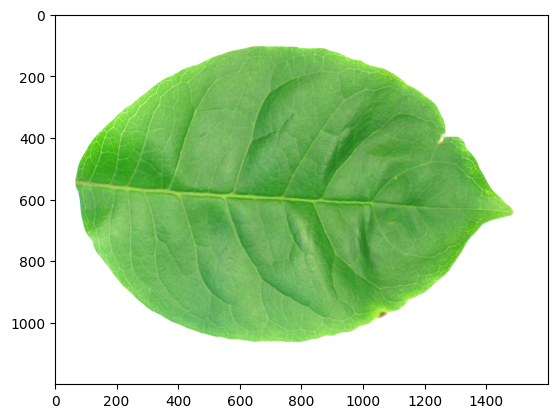

In [ ]:
plt.imshow(bg_rem_img)

In [ ]:
# prompt: install mahotas package

!pip install mahotas


In [ ]:
import mahotas as mt

In [ ]:
import cv2
import numpy as np
import pandas as pd
import mahotas as mt

def feature_extract(img):
    names = ['area', 'perimeter', 'pysiological_length', 'pysiological_width', 'aspect_ratio', 'rectangularity', 'circularity',
             'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b',
             'contrast', 'correlation', 'inverse_difference_moments', 'entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)

    return df


In [ ]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

<ipython-input-86-28bf7d672646>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,962051.5,3903.39643,1415,956,1.480126,1.406099,15.837514,53.606588,91.029718,41.066356,55.235877,90.833114,42.720173,22.473181,0.996399,0.619134,6.366914


In [ ]:
import pandas as pd
print(features_of_img.columns)
print(sc_X.get_feature_names_out())
features_of_img = features_of_img.rename(columns={
    "pysiological_length": "physiological_length",
    "pysiological_width": "physiological_width",
})
scaled_features = sc_X.transform(features_of_img)
y_pred_mobile = model_lgb.predict(scaled_features)
y_pred_mobile[0]

Index(['area', 'perimeter', 'pysiological_length', 'pysiological_width',
       'aspect_ratio', 'rectangularity', 'circularity', 'mean_r', 'mean_g',
       'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 'contrast', 'correlation',
       'inverse_difference_moments', 'entropy'],
      dtype='object')
['area' 'perimeter' 'physiological_length' 'physiological_width'
 'aspect_ratio' 'rectangularity' 'circularity' 'mean_r' 'mean_g' 'mean_b'
 'stddev_r' 'stddev_g' 'stddev_b' 'contrast' 'correlation'
 'inverse_difference_moments' 'entropy']


4

In [ ]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)

y_pred_mobile = model_lgb.predict(scaled_features)
y_pred_mobile[0]

[[ 1.38106926  0.19927847  0.39730575  0.32015247 -0.21204334 -0.34400158
  -0.458366    0.34501121  0.57025976  0.26903952  0.45119731  1.14640944
   0.1476742  -0.1907437  -0.19713182 -1.3290318   1.23472334]]


4

In [ ]:
print(sc_X.get_feature_names_out())


['area' 'perimeter' 'physiological_length' 'physiological_width'
 'aspect_ratio' 'rectangularity' 'circularity' 'mean_r' 'mean_g' 'mean_b'
 'stddev_r' 'stddev_g' 'stddev_b' 'contrast' 'correlation'
 'inverse_difference_moments' 'entropy']


In [ ]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
# Get the predicted label
predicted_label = int(y_pred_mobile[0])  # Convert the predicted label to an integer

# Get the common name corresponding to the predicted label
common_name = common_names[predicted_label]

# Print the predicted common name
print(f"Predicted Common Name: {common_name}")

Predicted Common Name: true indigo


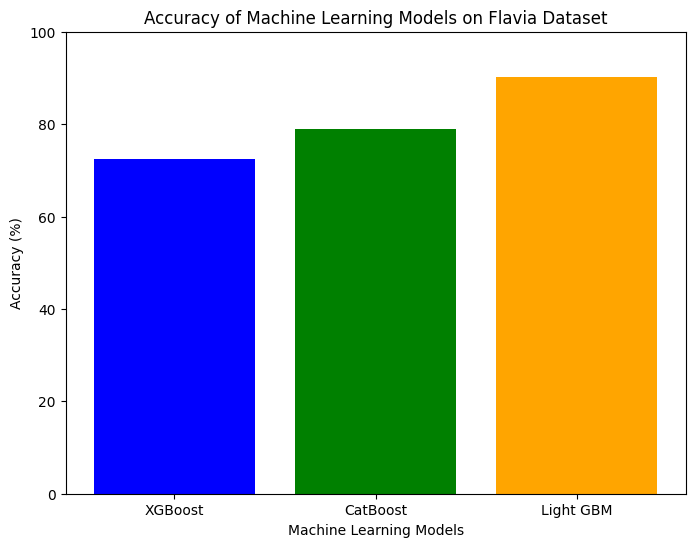

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['XGBoost', 'CatBoost', 'Light GBM']

# Model accuracies
accuracies = [72.54, 78.90, 90.24]

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Adding labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Machine Learning Models on Flavia Dataset')

# Displaying the plot
plt.ylim(0, 100)  # Set y-axis limits
plt.show()
